In [25]:
import re
import pandas as pd
from pandas import Index

In [26]:
def process(file):
    kl = re.compile("kl:")
    templist= [text.split(",") for text in filter(lambda text: kl.search(text),file)]
    string_pattern = re.compile("[a-z_]+:")
    result = pd.DataFrame(
        [list(map(lambda text:string_pattern.sub("",text.replace("\n","")), each_tuple)) 
         for each_tuple in templist])
#     batch = re.compile("batch i:([0-9]+)") 
#     elasped = re.compile("Time elapsed: ([0-9]+) seconds")
#     result['batch'] = [ batch.findall(text)[0] for text in filter(lambda text: batch.findall(text), file)]
#     result['elapsed']=[ elasped.findall(text)[0] for text in filter(lambda text: elasped.findall(text), file)]
    result.columns= Index(["kl","lr_multiplier",'loss','entropy','explained_var_old','explained_var_new'])
    return result

In [27]:
with open("../log/gomoku/fourlayer/output8by8_old.txt",'r') as f:
    oldfile =f.readlines()

In [28]:
with open("../log/gomoku/fourlayer/output8by8_new.txt",'r') as f:
    newfile = f.readlines()

In [29]:
start = process(oldfile)

In [31]:
end   = process(newfile)[5:]

In [32]:
end.head()

,kl,lr_multiplier,loss,entropy,explained_var_old,explained_var_new
5,0.02601,0.296,2.278672218322754,1.823736548423767,0.603,0.647
6,0.02520,0.296,2.309948205947876,1.8832497596740723,0.630,0.651
7,0.02624,0.296,2.251746892929077,1.9218686819076538,0.679,0.708
8,0.02412,0.296,2.232783317565918,1.9092395305633545,0.687,0.721
9,0.02081,0.296,2.2304439544677734,1.9297451972961426,0.697,0.739


In [33]:
fourlayer=start.append(end,ignore_index=True)
fourlayer =fourlayer.astype("float32")
# fourlayer.plot(y=["entropy",'loss','explained_var_old','explained_var_new'], title= "4-layer")

In [34]:
with open("../log/gomoku/threelayer/output8by8_simple_old.txt",'r') as f:
    oldfile =f.readlines()
with open("../log/gomoku/threelayer/output8by8_simple_new.txt",'r') as f:
    newfile = f.readlines()
start = process(oldfile)
end   = process(newfile)[5:]
threelayer =start.append(end,ignore_index=True)
threelayer = threelayer.astype("float32")
threelayer.plot(y=["entropy",'loss','explained_var_old','explained_var_new'], title= "3-layer")

In [35]:
with open("../log/gomoku/fivelayer/output8by8_5layers.txt") as f:
    file = f.readlines()

fivelayer = process(file)
# start
fivelayer = fivelayer.astype("float32")
# fivelayer.plot(y=["entropy",'loss','explained_var_old','explained_var_new'], title= "3-layer")

In [37]:
max_len = 1400

In [38]:
loss = pd.DataFrame()
loss['4-channel'] = fourlayer.loss[0:max_len]
loss['5-channel'] = fivelayer.loss[0:max_len]
loss['3-channel'] = threelayer.loss[0:max_len]

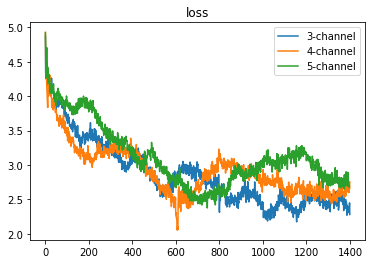

In [39]:
loss.plot(y= ['3-channel','4-channel','5-channel'],title = "loss")

In [40]:
entropy = pd.DataFrame()
entropy['4-channel'] = fourlayer.entropy[0:max_len]
entropy['5-channel'] = fivelayer.entropy[0:max_len]
entropy['3-channel'] = threelayer.entropy[0:max_len]

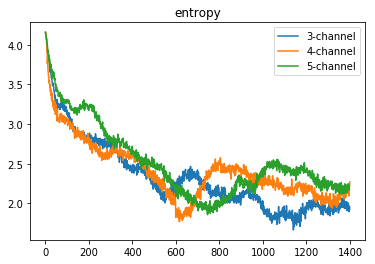

In [41]:
entropy.plot(y= ['3-channel','4-channel','5-channel'],title = "entropy")